# K-Means clustering

[sklearn 공식 문서](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

## 필요한 Library import

In [3]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

## KMeans 패키지 예시

```
# 데이터 예시
X = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]]) # (x, y) 순서쌍.

# K means 알고리즘을 사용할 객체 선언
# 함수 인자: n_cluster = 클러스터 개수
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)

# X에 할당된 label을 알고 싶다면?
kmeans.labels_

# K-means 알고리즘 결과 클러스터의 중심을 알고 싶다면?
kmeans.cluster_centers_

# 새로운 X에 대해 label을 예측하고 싶다면?
# ex) X_new = np.array([[0, 0], [12, 3]])
X_new = np.array([[0, 0], [12, 3]])
predicted_labels = kmeans.predict(X_new)
```


### 데이터 예시

In [14]:
# 데이터 예시
X = np.array([[1, 3], [2, 4], [3, 0],[4,0.3], [8, 2], [9, 4], [11, 1],[10,2]]) # (x, y) 순서쌍.

### 이해를 돕기 위한 시각화

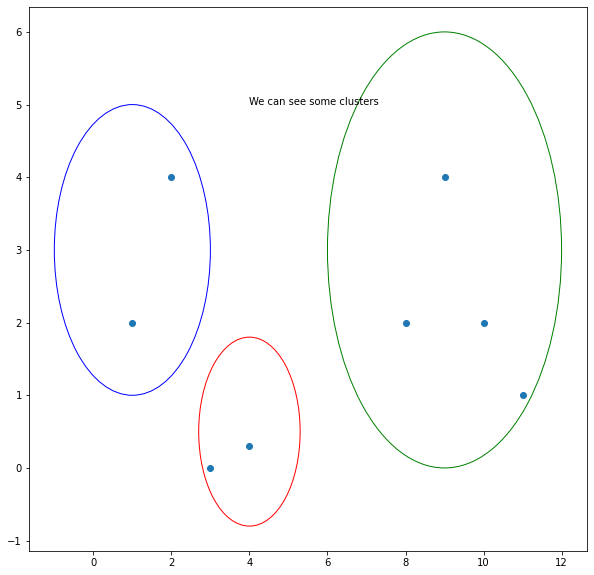

In [23]:
circle1 = plt.Circle((4, 0.5), 1.3, color='r',clip_on=False,fill=False)
circle2 = plt.Circle((1, 3), 2, color='blue',clip_on=False,fill=False)
circle3 = plt.Circle((9, 3), 3, color='g',clip_on=False, fill=False)

fig, ax = plt.subplots(figsize=(10,10)) # note we must use plt.subplots, not plt.subplot
# (or if you have an existing figure)
# fig = plt.gcf()
# ax = fig.gca()

ax.add_patch(circle1)
ax.add_patch(circle2)
ax.add_patch(circle3)

plt.scatter(X[:,0],X[:,1])
plt.annotate('We can see some clusters',xy= (4,5),)
plt.show()

### KMeans 학습

In [24]:
n_clusters=3 # 위 그림을 참고해서 클러스터의 개수를 3개로 셋팅.
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(X) # Kmeans 학습

KMeans(n_clusters=3, random_state=0)

### 결과 확인

In [26]:
# 결과 확인
# X에 할당된 label을 알고 싶다면?
kmeans.labels_

array([1, 1, 2, 2, 0, 0, 0, 0])

In [25]:
# K-means 알고리즘 결과 클러스터의 중심을 알고 싶다면?
kmeans.cluster_centers_

array([[9.5 , 2.25],
       [1.5 , 3.  ],
       [3.5 , 0.15]])

In [52]:
# 새로운 X에 대해 label을 예측하고 싶다면?
# ex) X_new = np.array([[0, 0], [12, 3]])
X_new = np.array([[2, 3], [12, 3]])
predicted_labels = kmeans.predict(X_new)
predicted_labels

array([1, 0])

### 결과 시각화

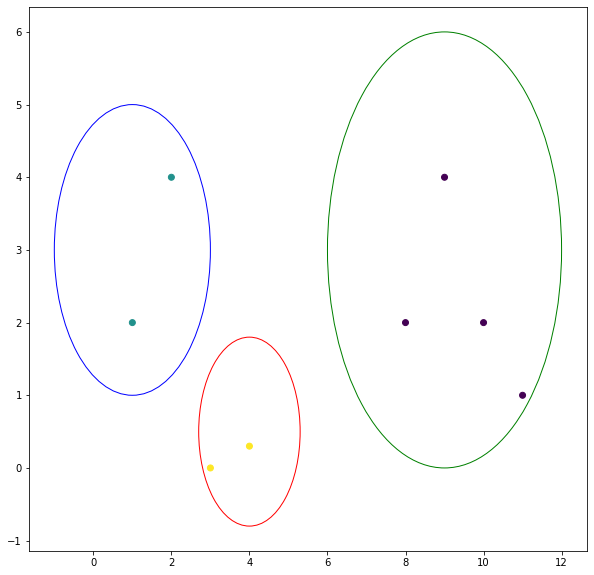

In [54]:
circle1 = plt.Circle((4, 0.5), 1.3, color='r',clip_on=False,fill=False)
circle2 = plt.Circle((1, 3), 2, color='blue',clip_on=False,fill=False)
circle3 = plt.Circle((9, 3), 3, color='g',clip_on=False, fill=False)

fig, ax = plt.subplots(figsize=(10,10)) # note we must use plt.subplots, not plt.subplot
# (or if you have an existing figure)
# fig = plt.gcf()
# ax = fig.gca()

ax.add_patch(circle1)
ax.add_patch(circle2)
ax.add_patch(circle3)

plt.scatter(X[:,0],X[:,1],c=kmeans.labels_)
plt.show()

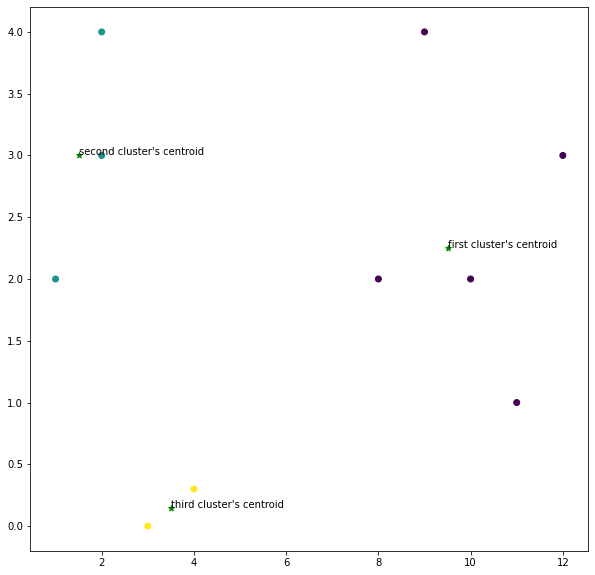

In [60]:
# 테스트 데이터에 대한 결과 시각화
fig, ax = plt.subplots(figsize=(10,10)) 

# 학습 데이터와 테스트 데이터 결합.
X_train_and_new = np.vstack((X,X_new))
labels_train_and_new = np.hstack((kmeans.labels_,predicted_labels))

plt.scatter(X_train_and_new[:,0],X_train_and_new[:,1],c=labels_train_and_new)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], c = 'green', label = 'Centroids', marker = '*' )
plt.annotate('first cluster\'s centroid',(kmeans.cluster_centers_[0,0],kmeans.cluster_centers_[0,1]))
plt.annotate('second cluster\'s centroid',(kmeans.cluster_centers_[1,0],kmeans.cluster_centers_[1,1]))
plt.annotate('third cluster\'s centroid',(kmeans.cluster_centers_[2,0],kmeans.cluster_centers_[2,1]))

plt.show()

## 실제 데이터 예시

### 데이터 불러오기

In [61]:
from sklearn import datasets

In [62]:
iris = datasets.load_iris()

In [ ]:
# iris의 정체가 궁금하다면 맨 아래 주석을 해제하고 실행해보세요.
# {'data': 데이터 array, 'target': 타겟 데이터 array} 입니다
# iris

In [63]:
X = iris.data[:, :2] # 2개의 컬럼만 사용 (시각화 목적)
y = iris.target

Text(0, 0.5, 'Sepal Width')

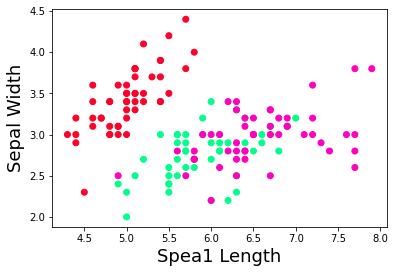

In [64]:
# 시각화
# Kmeans 학습에 y값을 사용하지 않는 것은 주의해주세요.
# 실제로 학습시킬 수 있는 label이 있는 경우 Kmeans를 굳이 사용하진 않습니다.
# 이 전 시간에 배웠던 tree, Random forest, 로지스틱 regression을 사용하는 것이 더 좋을 수 있습니다.
plt.scatter(X[:,0], X[:,1], c=y, cmap='gist_rainbow')
plt.xlabel('Spea1 Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)

In [65]:
km = KMeans(n_clusters = 3, n_jobs = 4, random_state=21)
km.fit(X)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=4, random_state=21)

In [66]:
# K means 결과 구한 클러스터의 중심점 확인
centers = km.cluster_centers_
print(centers)

[[5.77358491 2.69245283]
 [5.006      3.428     ]
 [6.81276596 3.07446809]]


Text(0.5, 1.0, 'Predicted')

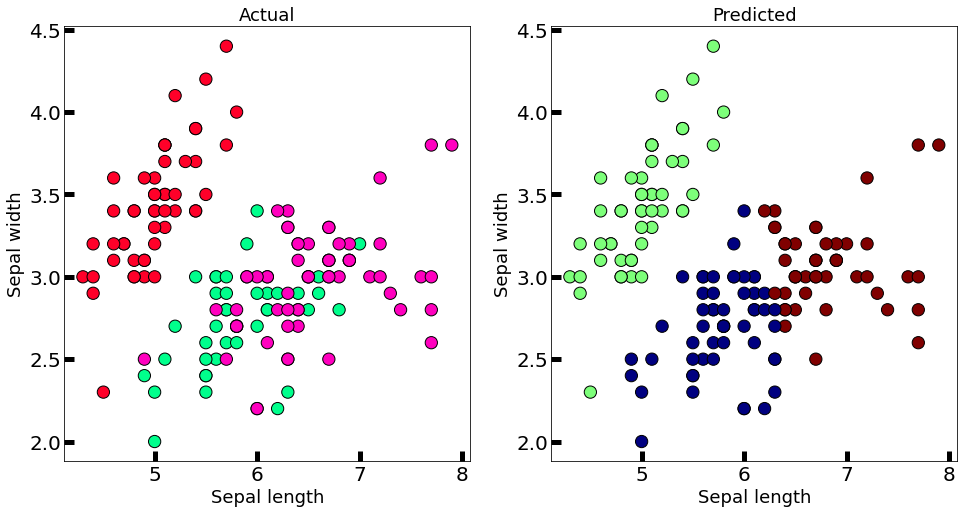

In [67]:
# 결과를 시각화를 통해 확인
new_labels = km.labels_
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(X[:, 0], X[:, 1], c=new_labels, cmap='jet',
edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

## 실습

아래 X, y에 대해 K-means 알고리즘을 사용해서 클러스터링을 해보세요.

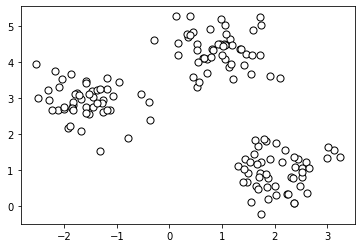

In [68]:
from sklearn.datasets import make_blobs
# create dataset
X, y = make_blobs(
   n_samples=150, n_features=2,
   centers=3, cluster_std=0.5,
   shuffle=True, random_state=0
)

# plot
plt.scatter(
   X[:, 0], X[:, 1],
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.show()

In [ ]:
km = KMeans(n_clusters = 3, n_jobs = 4, random_state=21)
km.fit(X)
# KMeans 객체를 선언하고 학습시켜주세요.

In [ ]:
y_km = km.predict(X) # KMeans 를 학습시킨 객체를 y_km에 저장해주세요

In [ ]:
# 시각화 참고사항입니다.
# 위 두 문제를 푸시고 실행시켜주세요.
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

### 해답

In [75]:
km = KMeans(n_clusters=3)
km.fit(X)

KMeans(n_clusters=3)

In [76]:
y_km = km.predict(X)

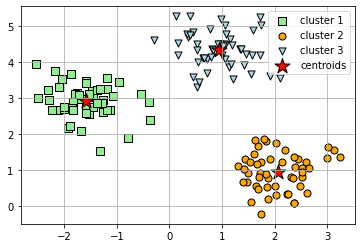

In [77]:
## 시각화 참고사항입니다.
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()